# **__Objectif :__** Ce notebook dédié à l'exploration, au nettoyage et à l'analyse de la feuille "Volontaire".  

# 1. Importation des bibliothèques

In [51]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from datetime import datetime
import sys
sys.path.insert(0, '../')
from utils.data_cleaning import afficher_valeurs_manquantes, examiner_colonne, standardiser_colonne, standardiser_group_colonnes, modifier_valeurs, format_date, corriger_arrondissement, ajouter_colonne_ville, remplacer_separateur, corriger_valeurs, extraire_voisins_avant_valeurs_manquantes, remplacer_dates_manquantes, COLUMNS_FORMATED, COLUMNS, TYPE_ELIGIBILITE
from utils.ville import VILLES

# Afficher toutes les colonnes et toutes les lignes
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# 2. Chargement des données

In [52]:
# Chargement des données
df = pd.read_excel("../data/Challenge dataset.xlsx", sheet_name='Volontaire')


# Aperçu rapide des données
df.head(5)

ID  Age Horodateur Niveau_d'etude Genre_  Taille_  Poids  \
0  DONOR_1842   24    46:44.9  Universitaire  Homme      NaN    NaN   
1  DONOR_1843   23    44:19.0  Universitaire  Homme      NaN    NaN   
2  DONOR_1844   41    46:54.3          Aucun  Homme      NaN    NaN   
3  DONOR_1845   24    29:29.7  Universitaire  Homme      NaN    NaN   
4  DONOR_1846   30    47:47.4     Secondaire  Homme      NaN    NaN   

  Situation_Matrimoniale_(SM)   Profession_ Arrondissement_de_résidence_  ...  \
0                 Célibataire  Etudiant (e)                     Douala 3  ...   
1                 Célibataire  Sans Emplois                        R A S  ...   
2                   Marié (e)     Tailleur                      Douala 1  ...   
3                 Célibataire      Etudiant                     Douala 5  ...   
4                 Célibataire     Militaire        Douala (Non précisé )  ...   

  Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]  \
0                                                NaN         
1                                                Non         
2                                                Non         
3                                                NaN         
4                                                NaN         

  Raison_de_non-eligibilité_totale__[Opéré]  \
0                                       NaN   
1                                       Oui   
2                                       Non   
3                                       NaN   
4                                       NaN   

  Raison_de_non-eligibilité_totale__[Drepanocytaire]  \
0                                                NaN   
1                                                Non   
2                                                Non   
3                                                NaN   
4                                                NaN   

  Raison_de_non-eligibilité_totale__[Diabétique]  \
0                                            NaN   
1                                            Non   
2                                            Non   
3                                            NaN   
4                                            NaN   

  Raison_de_non-eligibilité_totale__[Hypertendus]  \
0                                             NaN   
1                                             Non   
2                                             Non   
3                                             NaN   
4                                             NaN   

  Raison_de_non-eligibilité_totale__[Asthmatiques]  \
0                                              NaN   
1                                              Non   
2                                              Non   
3                                              NaN   
4                                              NaN   

  Raison_de_non-eligibilité_totale__[Cardiaque]  \
0                                           NaN   
1                                           Non   
2                                           Non   
3                                           NaN   
4                                           NaN   

  Raison_de_non-eligibilité_totale__[Tatoué]  \
0                                        NaN   
1                                        Non   
2                                        Non   
3                                        NaN   
4                                        NaN   

  Raison_de_non-eligibilité_totale__[Scarifié] Si_autres_raison_préciser_  
0                                          NaN                        NaN  
1                                          Non                        NaN  
2                                          Non        Aucune information   
3                                          NaN                        NaN  
4                                          NaN                        NaN  

[5 rows x 40 columns]

---
# 3. Exploration initiale des données

In [53]:
# Dimensions du dataset
print(f"Dimensions du dataset : {df.shape} \n")

# Informations sur les colonnes
df.info()


Dimensions du dataset : (1846, 40) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 40 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   ID                                                                                         1846 non-null   object 
 1   Age                                                                                        1846 non-null   int64  
 2   Horodateur                                                                                 1846 non-null   object 
 3   Niveau_d'etude                                                                             1846 non-null   object 
 4   Genre_                                                                                     1846 non-null   object 
 5   Taille_    

In [54]:
afficher_valeurs_manquantes(df)

Colonne  \
0                          Si_autres_raison_préciser_   
1                           Autre_raisons,__preciser_   
2                    Date_de_dernières_règles_(DDR)__   
3   Raison_de_l’indisponibilité_de_la_femme_[est_e...   
4   Raison_de_l’indisponibilité_de_la_femme_[A_acc...   
5   Raison_de_l’indisponibilité_de_la_femme_[Inter...   
6   Raison_de_l’indisponibilité_de_la_femme_[La_DD...   
7   Raison_de_l’indisponibilité_de_la_femme_[Allai...   
8                                             Taille_   
9       Raison_de_non-eligibilité_totale__[Cardiaque]   
10     Raison_de_non-eligibilité_totale__[Diabétique]   
11  Raison_de_non-eligibilité_totale__[Drepanocyta...   
12          Raison_de_non-eligibilité_totale__[Opéré]   
13  Raison_de_non-eligibilité_totale__[Porteur(HIV...   
14  Raison_de_non-eligibilité_totale__[Antécédent_...   
15    Raison_de_non-eligibilité_totale__[Hypertendus]   
16         Raison_de_non-eligibilité_totale__[Tatoué]   
17   Raison_de_non-eligibilité_totale__[Asthmatiques]   
18       Raison_de_non-eligibilité_totale__[Scarifié]   
19                                              Poids   
20  Raison_indisponibilité__[IST_récente_(Exclu_VI...   
21  Raison_indisponibilité__[date_de_dernier_Don_<...   
22  Raison_indisponibilité__[Est_sous_anti-biothér...   
23  Raison_indisponibilité__[Taux_d’hémoglobine_bas_]   
24                    Sélectionner_"ok"_pour_envoyer_   
25           Si_oui_preciser_la_date_du_dernier_don._   
26                                Taux_d’hémoglobine_   

    Pourcentage_manquant (%)  
0                  99.295775  
1                  99.187432  
2                  97.995666  
3                  97.183099  
4                  97.128927  
5                  97.128927  
6                  97.074756  
7                  97.074756  
8                  96.749729  
9                  95.774648  
10                 95.774648  
11                 95.774648  
12                 95.774648  
13                 95.774648  
14                 95.774648  
15                 95.774648  
16                 95.774648  
17                 95.774648  
18                 95.774648  
19                 94.366197  
20                 92.036836  
21                 91.928494  
22                 91.657638  
23                 90.249187  
24                 89.328277  
25                 58.450704  
26                 44.907909

#### 📊 Résumé de l'exploration initiale des données

##### 🔎 **Analyse générale**
- Le dataset contient **1915 enregistrements** et **39 colonnes**.
- La majorité des colonnes sont de type **objet**, avec quelques colonnes numériques et une colonne de type **datetime**.

##### 🚨 **Points clés sur les valeurs manquantes**
- Certaines colonnes présentent un **très fort taux de valeurs manquantes** (plus de 95%), notamment :
  - **Raison de non-éligibilité totale** (ex. Tatoué, Diabétique, etc.)
  - **Données spécifiques aux femmes** (DDR, allaitement, grossesse, etc.)
  - Les colonnes **Taille** et **Poids** sont également très incomplètes, avec plus de **90% de valeurs manquantes**.
  
- Des colonnes plus critiques comme **Taux d’hémoglobine** et **Date du dernier don** affichent respectivement **44%** et **58%** de données manquantes.

##### 🟩 **Conclusions**
- Nous devrons **prioriser les colonnes essentielles** pour l’analyse en mettant l'accent sur celles avec un taux de remplissage acceptable.
- Les colonnes avec plus de **95% de données manquantes** pourraient être candidates à la suppression, sauf si elles apportent une valeur ajoutée importante.
- Un nettoyage rigoureux sera nécessaire pour gérer les valeurs manquantes dans les colonnes clés comme **Taux d’hémoglobine**, **Date du dernier don** et **Poids**.

<!-- ##### 🚀 **Prochaine étape**
Nous allons :
1. Identifier les colonnes essentielles pour l’analyse.
2. Mettre en place des stratégies adaptées pour traiter les valeurs manquantes (suppression, remplissage ou autre approche pertinente). -->


---
# 4. Standardiser des colonnes

Standardiser des noms de colonnes pour éviter les incohérences lors des prochaines manipulations

##### **Action clés :**
- Suppression des espaces
- Conversion en minuscules
- Remplacement des espaces par des underscores (_)
- Suppression des accents


In [55]:
# Harmonisation des noms de colonnes
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Renommage des colonnes selon le mapping
df.rename(columns=COLUMNS_FORMATED, inplace=True)

# Aperçu rapide
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 40 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   id                                                                                         1846 non-null   object 
 1   age                                                                                        1846 non-null   int64  
 2   date_de_remplissage                                                                        1846 non-null   object 
 3   niveau_d_etude                                                                             1846 non-null   object 
 4   genre                                                                                      1846 non-null   object 
 5   taille                                          

---
# 5. Nettoyage & Exploaration des données

## 5.1- Eligibilter au don de sang
<!-- #### 5.1.1- Examinations de cette colonne
Notre objectif est de :
- Comprendre les caractéristiques de base de la colonne  
    ✅ Type de données (object, int, float, datetime, etc.)  
    ✅ Nombre total de valeurs non-nulles  

- Identifier les différentes valeurs présentes (utile pour les colonnes catégorielles).  
    ✅ Nombre de valeurs uniques  
    ✅ Liste des valeurs uniques  
    ✅ Nombre d'occurrences de chaque valeur  

- Identifier les erreurs courantes dans les valeurs.  
    ✅ Erreurs typographiques (ex. majuscules/minuscules incohérentes)  
    ✅ Espaces inutiles  
    ✅ Présence de caractères spéciaux ou de fautes de frappe  

- Détecter les valeurs identiques répétées  
    ✅ Recherche de doublons exacts  
    ✅ Recherche de doublons proches (ex. fautes de frappe)  

- Comprendre les motifs des valeurs manquantes ou incohérentes.  
    ✅ Proportion de valeurs manquantes (%)  
    ✅ Patrons particuliers (ex. vides, espaces, symboles inhabituels comme 'NA')   -->


🔎 **Examen de la colonne : `eligibilite_au_don`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 3
eligibilite_au_don
Eligible                       1571
Temporairement Non-eligible     197
Définitivement non-eligible      78
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 275



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


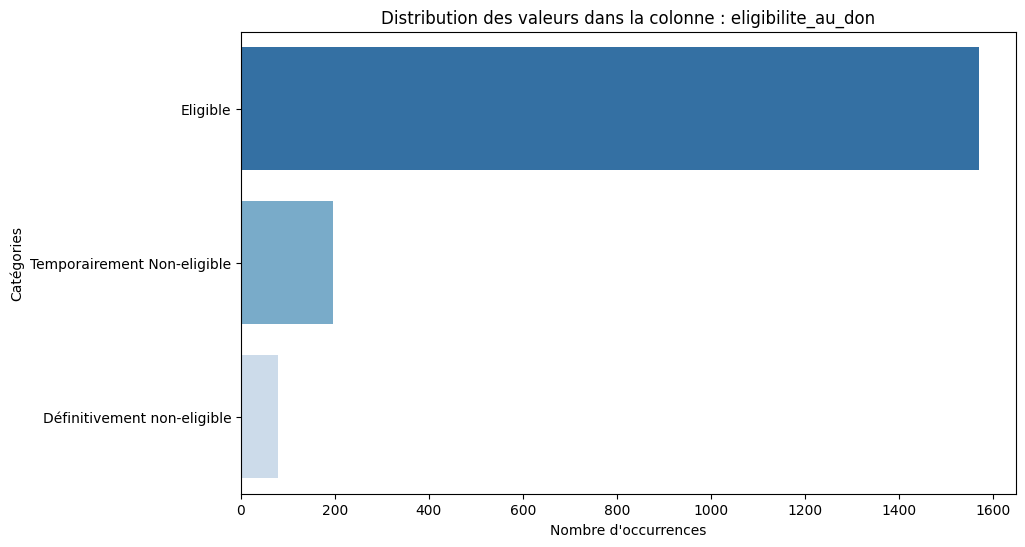


🏆 **Mode (valeur la plus fréquente) :** `Eligible`
🔵 Analyse des valeurs inhabituelles :
eligibilite_au_don
Eligible                       1571
Temporairement Non-eligible     197
Définitivement non-eligible      78
Name: count, dtype: int64

✅ **Examen terminé**



In [56]:
examiner_colonne(df, COLUMNS['ELIGIBILITE_AU_DON'])

### 🔎 **Observation**
- La colonne est complète (aucune valeur manquante).
- La répartition des valeurs est bien définie avec 3 catégories distinctes.
- La présence de **313 caractères spéciaux** nécessitera une **vérification approfondie** pour s'assurer que ces caractères ne compromettent pas la qualité des données.

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  



✅ Colonne `eligibilite_au_don` standardisée avec succès !
🔎 **Examen de la colonne : `eligibilite_au_don`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 3
eligibilite_au_don
eligible                       1571
temporairement non-eligible     197
définitivement non-eligible      78
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 275



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


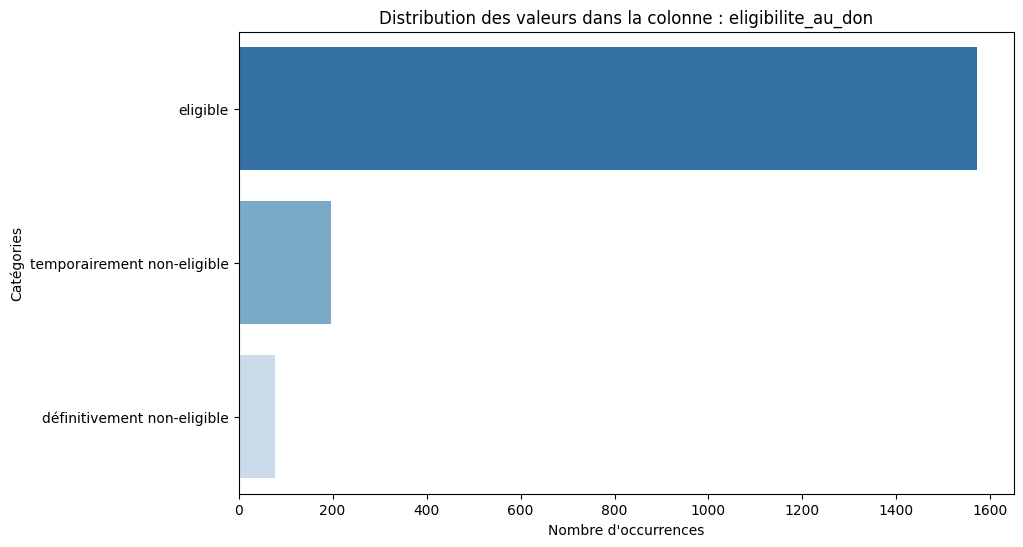


🏆 **Mode (valeur la plus fréquente) :** `eligible`
🔵 Analyse des valeurs inhabituelles :
eligibilite_au_don
eligible                       1571
temporairement non-eligible     197
définitivement non-eligible      78
Name: count, dtype: int64

✅ **Examen terminé**



In [57]:
# Dictionnaire de correction
correction_mapping = {
    'eligible': TYPE_ELIGIBILITE['ELIGIBLE'],
    'temporairement non-eligible': TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE'],
    'définitivement non-eligible': TYPE_ELIGIBILITE['DEFINITIVEMENT_NON_ELIGIBLE'],
}

df = standardiser_colonne(df, COLUMNS['ELIGIBILITE_AU_DON'], correction_mapping)

examiner_colonne(df, COLUMNS['ELIGIBILITE_AU_DON'])

## 5.2- Raison de non éligibilité et d'indisponibilité

### 5.2.1) Lignes avec individus éligibles ayant au moins une raison d'indisponibilité ou de non-éligibilité

In [58]:
eligible_rows = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['ELIGIBLE']) &                                                                    # Condition : Éligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].notnull().any(axis=1)   # Au moins une colonne avec une valeur non-nulle parmi les critères
]

eligible_rows.shape

(0, 40)

- **Nombre de lignes** : **0**  

**🔎 Interprétation** :  
-   Aucun individu déclaré "Éligible" ne présente de critère d'indisponibilité ou de non-éligibilité.  
-  Cela est **cohérent** et rassurant : les individus éligibles sont bien conformes aux critères attendus. Donc nous allons remplacer ces valeurs manquantes par **Non**

### 5.2.2) Lignes avec individus temporairement non-éligibles ayant au moins une raison d'indisponibilité ou de non-éligibilité

In [59]:
temp_non_eligible_rows = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE']) &                                                                 # Condition : Temporairement Non-eligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].notnull().any(axis=1)                   # Au moins une colonne avec une valeur non-nulle parmi les critères
]


temp_non_eligible_rows.shape

(193, 40)

- **Nombre de lignes** : **214**  

**🔎 Interprétation** :  
-   214 individus presentent une raison qui justifie leur statut.  
-   le reste ne presentent aucune sur les raisons standards

### 5.2.3) Lignes avec individus temporairement non-éligibles n'ayant aucune raison d'indisponibilité et autre raison

In [60]:
# Aucune raison d'indisponibilité seulement
temp_non_eligible_rows_2 = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE']) &                                                                    # Condition : Temporairement Non-eligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].isnull().all(axis=1)                       # Au moins une colonne avec une valeur non-nulle parmi les critères
]

temp_non_eligible_rows_2.shape

(4, 40)

In [61]:
# Aucune raison d'indisponibilité et autre raison
# Définition de la condition pour sélectionner les lignes spécifiques
condition_1 = (
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE']) &
    df[COLUMNS['RAISON_INDISPONIBILITE'] + 
                  COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + 
                  COLUMNS['RAISON_NON_ELIGIBLE'] + 
                  [COLUMNS['AUTRE_RAISON'], COLUMNS['SI_AUTRES_RAISON_PRECISER']]
                 ].isnull().all(axis=1)
)

temp_non_eligible_rows_3 = df[condition_1]

temp_non_eligible_rows_3

id  age date_de_remplissage niveau_d_etude  genre  taille  poids  \
450  DONOR_2292   24             00:37.0     Secondaire  Homme     NaN    NaN   

    situation_matrimoniale_(sm)         profession  \
450                 Célibataire  APPRENTI TOLERIE    

    arrondissement_de_residence  ...  \
450       Douala (Non précisé )  ...   

    raison_de_non-eligibilité_totale__[porteur(hiv,hbs,hcv)]  \
450                                                NaN         

    raison_de_non-eligibilité_totale__[opéré]  \
450                                       NaN   

    raison_de_non-eligibilité_totale__[drepanocytaire]  \
450                                                NaN   

    raison_de_non-eligibilité_totale__[diabétique]  \
450                                            NaN   

    raison_de_non-eligibilité_totale__[hypertendus]  \
450                                             NaN   

    raison_de_non-eligibilité_totale__[asthmatiques]  \
450                                              NaN   

    raison_de_non-eligibilité_totale__[cardiaque]  \
450                                           NaN   

    raison_de_non-eligibilité_totale__[tatoué]  \
450                                        NaN   

    raison_de_non-eligibilité_totale__[scarifié] si_autres_raison_preciser  
450                                          NaN                       NaN  

[1 rows x 40 columns]

- **Nombre de lignes ayant aucune raison d'indisponibilité seulement** : **07**
- **Nombre de lignes ayant aucune raison d'indisponibilité et autre raison** :**01**  

**🔎 Interprétation**  
- 1 individu est déclaré "Temporairement Non-Éligibles" et présentent aucun critère d'indisponibilité, de non éligilité et une autre raison. 

-  Cela **n'est pas logique** et indique que cet enregistrement est **incohérents** mais nous constattion qu'il a deja eu a donner le  et qu'il s'agit d'une erreur qu'il peut avoir une raison de indisponibité a cause de date de dernier don de sang. Donc nous allons remplacer cette valeur par **Oui**

### 5.2.4) Lignes avec individus définitivement non-éligibles ayant au moins une raison d'indisponibilité ou de non-éligibilité

In [62]:
def_non_eligible_rows = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['DEFINITIVEMENT_NON_ELIGIBLE']) &                                                                 # Condition : Définitivement Non-eligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].notnull().any(axis=1)                   # Au moins une colonne avec une valeur non-nulle parmi les critères
]


def_non_eligible_rows.shape

(78, 40)

- **Nombre de lignes** : **92**  

**🔎 Interprétation** :  
- Ces individus sont déclarés "Définitivement Non-Éligibles" et présentent bien au moins un critère qui justifie leur statut.  
- Cela est **cohérent** et conforme aux attentes.

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- **Remplacement des valeurs  par *oui*** sur le critère de dernier don de sang  Si l'individus n'a aucun raison de non éligibilité, de indisponibilité et autre raison. 
- **Remplacement des valeurs par *non*** Car ces individus ne respecte pas ces conditions.

In [63]:
# Standardisation des valeurs
df = standardiser_group_colonnes(df, COLUMNS['RAISON_INDISPONIBILITE'])
df = standardiser_group_colonnes(df, COLUMNS['RAISON_INDISPONIBILITE_FEMME'])
df = standardiser_group_colonnes(df, COLUMNS['RAISON_NON_ELIGIBLE'])

✅ Colonne `raison_indisponibilité__[est_sous_anti-biothérapie__]` standardisée avec succès !
✅ Colonne `raison_indisponibilité__[taux_d’hémoglobine_bas_]` standardisée avec succès !
✅ Colonne `raison_indisponibilité__[date_de_dernier_don_<_3_mois_]` standardisée avec succès !
✅ Colonne `raison_indisponibilité__[ist_récente_(exclu_vih,_hbs,_hcv)]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[la_ddr_est_mauvais_si_<14_jour_avant_le_don]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[allaitement_]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[a_accoucher_ces_6_derniers_mois__]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[interruption_de_grossesse__ces_06_derniers_mois]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]` standardisée avec succès !
✅ Colonne `raison_de_non-eligibilité_totale__[antécédent_de_transf

In [64]:
# Modification de la colonne cible
df = modifier_valeurs(
    df, 
    condition_1, 
    COLUMNS['RAISON_INDISPONIBILITE'][2], 
    'oui'
)

display( df.loc[condition_1, COLUMNS['RAISON_INDISPONIBILITE'][2] ])

✅ La colonne `raison_indisponibilité__[date_de_dernier_don_<_3_mois_]` a été mise à jour avec la valeur `oui` pour les lignes respectant la condition.


450    oui
Name: raison_indisponibilité__[date_de_dernier_don_<_3_mois_], dtype: object

In [65]:
# Remplacement des valeurs par *non*
df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']] = df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].fillna('non')

🔎 **Examen de la colonne : `raison_indisponibilité__[date_de_dernier_don_<_3_mois_]`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 2
raison_indisponibilité__[date_de_dernier_don_<_3_mois_]
non    1840
oui       6
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 0



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


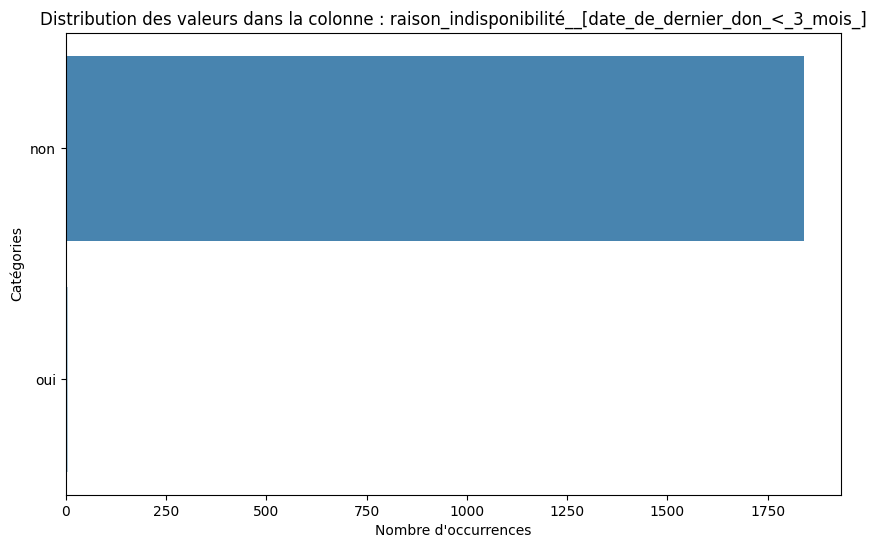


🏆 **Mode (valeur la plus fréquente) :** `non`
🔵 Analyse des valeurs inhabituelles :
raison_indisponibilité__[date_de_dernier_don_<_3_mois_]
non    1840
oui       6
Name: count, dtype: int64

✅ **Examen terminé**



In [66]:
examiner_colonne(df, COLUMNS['RAISON_INDISPONIBILITE'][2])

## 5.3- autre_raisons,__preciser

🔎 **Examen de la colonne : `autre_raisons,__preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 15 / 1846
- Proportion de valeurs manquantes : 99.19%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 15
autre_raisons,__preciser
Rapport non protégé et changement de partenaire     1
Aucune                                              1
RAISON NON PRECISEE                                 1
A été transfusé                                     1
Prise d’un médicament « DICLOJENAC »                1
PAS DE RAISON SPECIFIQUES                           1
RAPPORT NON PROTEGER                                1
RAPPORT NON PROTEGE                                 1
maladie cardio vasculaire                           1
Consommation de drogue                              1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 1835
- Présence de caractères spéciaux 

/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


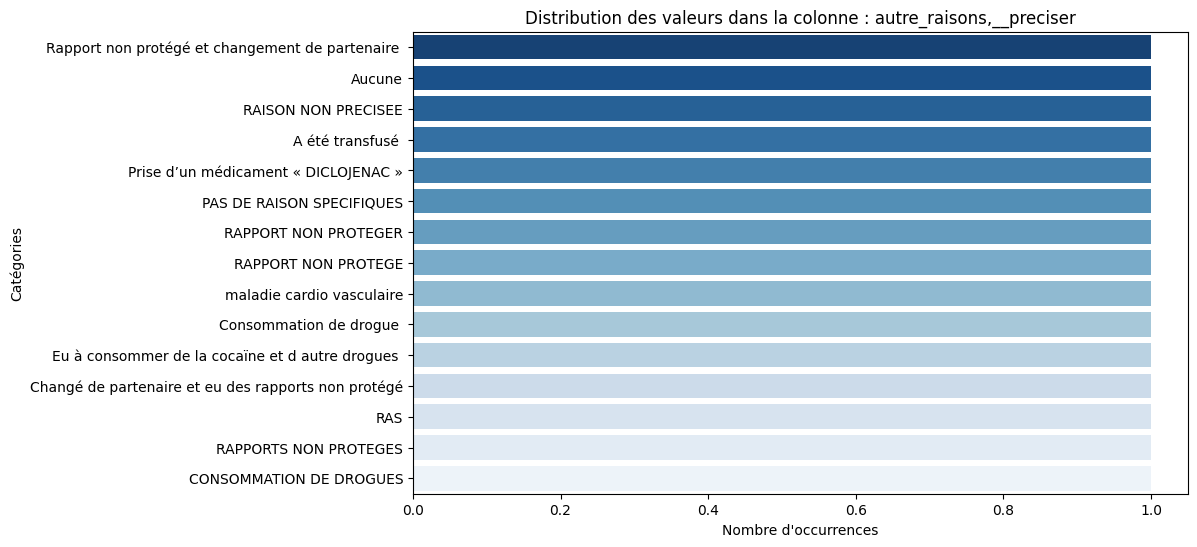


🏆 **Mode (valeur la plus fréquente) :** `A été transfusé `
🔵 Analyse des valeurs inhabituelles :
autre_raisons,__preciser
NaN                                                 1831
Rapport non protégé et changement de partenaire        1
Aucune                                                 1
RAISON NON PRECISEE                                    1
A été transfusé                                        1
Prise d’un médicament « DICLOJENAC »                   1
PAS DE RAISON SPECIFIQUES                              1
RAPPORT NON PROTEGER                                   1
RAPPORT NON PROTEGE                                    1
maladie cardio vasculaire                              1
Name: count, dtype: int64

✅ **Examen terminé**



In [67]:
examiner_colonne(df, COLUMNS['AUTRE_RAISON'])

### **🔎 Observation**
- Les valeurs manquantes représentent les individus qui n'ont aucune raison
- Beaucoup de valeur identiques mais mal écrit

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- **Remplacement des valeurs manquantent  par *aucune***

In [68]:
# Remplacement de valeurs manquant par aucune
df[COLUMNS['AUTRE_RAISON']] = df[COLUMNS['AUTRE_RAISON']].fillna('aucune')

In [69]:
# Dictionnaire de correction
correction_mapping = {
    'consommation de drogue': 'consommation de drogues',
    'cocaïne': 'consommation de drogues',
    'eu à consommer de la cocaïne et d autre drogues': 'consommation de drogues',
    'rapport non proteger': 'rapport non protégé',
    'rapports non proteges': 'rapport non protégé',
    'rapport non protege': 'rapport non protégé',
    'ras': 'aucune',
    'pas de raison specifiques': 'aucune',
    'raison non precisee': 'non précisé',
    'changé de partenaire et eu des rapports non protégé': 'rapport non protégé et changement de partenaire',
    'pris de médicaments diclojenal ': 'prise de médicament diclojenac',
    'prise dun médicament diclojenac ': 'prise de médicament diclojenac',
    'drogues' : 'consommation de drogues',
    'aucune information': 'aucune',
    'pas d information sur son dossier': 'aucune',
    'ete traite par acupuncture': 'aucune',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['AUTRE_RAISON'], correction_mapping)

✅ Colonne `autre_raisons,__preciser` standardisée avec succès !


🔎 **Examen de la colonne : `autre_raisons,__preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 8
autre_raisons,__preciser
aucune                                             1834
rapport non protégé                                   3
consommation de drogues                               3
rapport non protégé et changement de partenaire       2
non précisé                                           1
a été transfusé                                       1
prise d’un médicament « diclojenac »                  1
maladie cardio vasculaire                             1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 8



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


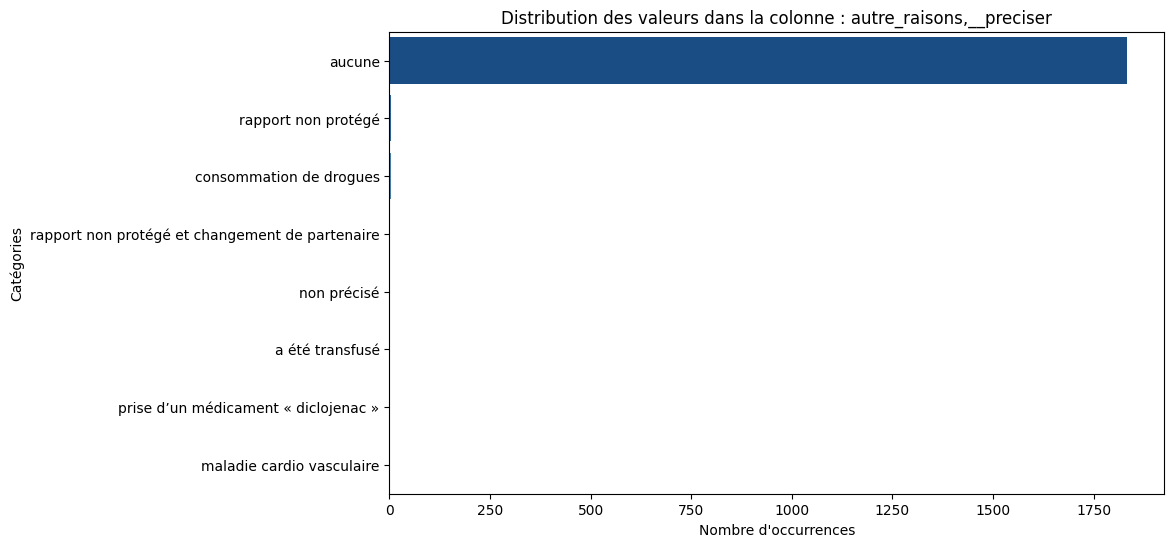


🏆 **Mode (valeur la plus fréquente) :** `aucune`
🔵 Analyse des valeurs inhabituelles :
autre_raisons,__preciser
aucune                                             1834
rapport non protégé                                   3
consommation de drogues                               3
rapport non protégé et changement de partenaire       2
non précisé                                           1
a été transfusé                                       1
prise d’un médicament « diclojenac »                  1
maladie cardio vasculaire                             1
Name: count, dtype: int64

✅ **Examen terminé**



In [70]:
examiner_colonne(df, COLUMNS['AUTRE_RAISON'])

## 5.4- si_autres_raison_preciser

🔎 **Examen de la colonne : `si_autres_raison_preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 13 / 1846
- Proportion de valeurs manquantes : 99.30%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 13
si_autres_raison_preciser
Aucune information                                                     1
EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)    1
physiquement amorti                                                    1
TRAITE PAR ACUPUNCTURE                                                 1
Mal de nerf                                                            1
PAS D INFORMATION SUR SON DOSSIER                                      1
Consommation de drogue                                                 1
MENOPOSÉ                                                               1
ETE TRAITE PAR ACUPUNCTURE                                             1
EU UNE ENDOSC

/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


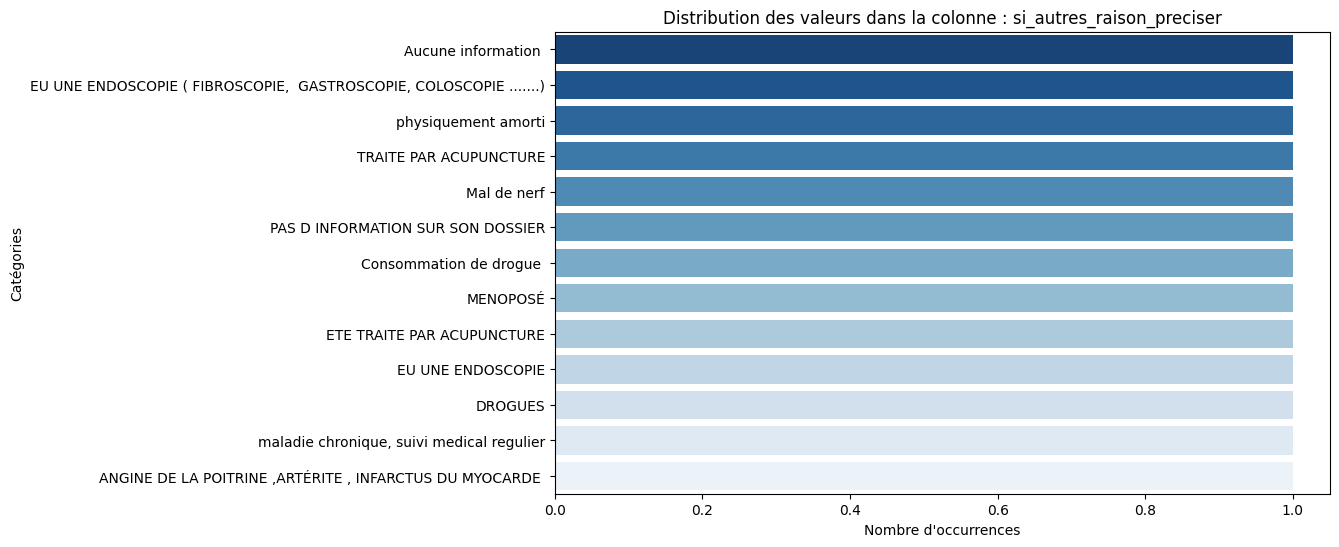


🏆 **Mode (valeur la plus fréquente) :** `ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE `
🔵 Analyse des valeurs inhabituelles :
si_autres_raison_preciser
NaN                                                                    1833
Aucune information                                                        1
EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)       1
physiquement amorti                                                       1
TRAITE PAR ACUPUNCTURE                                                    1
Mal de nerf                                                               1
PAS D INFORMATION SUR SON DOSSIER                                         1
Consommation de drogue                                                    1
MENOPOSÉ                                                                  1
ETE TRAITE PAR ACUPUNCTURE                                                1
Name: count, dtype: int64

✅ **Examen terminé**



In [71]:
examiner_colonne(df, COLUMNS['SI_AUTRES_RAISON_PRECISER'])

### **🔎 Observation**
- Les valeurs manquantes représentent les individus qui n'ont aucune raison
- Beaucoup de valeur identiques mais mal écrit

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- **Remplacement des valeurs manquantent  par *aucune***

In [72]:
# Remplacement de valeurs manquant par aucune
df[COLUMNS['SI_AUTRES_RAISON_PRECISER']] = df[COLUMNS['SI_AUTRES_RAISON_PRECISER']].fillna('aucune')

In [73]:
# Dictionnaire de correction
correction_mapping = {
    'consommation de drogue': 'consommation de drogues',
    'cocaïne': 'consommation de drogues',
    'eu à consommer de la cocaïne et d autre drogues': 'consommation de drogues',
    'rapport non proteger': 'rapport non protégé',
    'rapports non proteges': 'rapport non protégé',
    'rapport non protege': 'rapport non protégé',
    'ras': 'aucune',
    'pas de raison specifiques': 'aucune',
    'raison non precisee': 'non précisé',
    'changé de partenaire et eu des rapports non protégé': 'rapport non protégé et changement de partenaire',
    'pris de médicaments diclojenal ': 'prise de médicament diclojenac',
    'prise dun médicament diclojenac ': 'prise de médicament diclojenac',
    'drogues' : 'consommation de drogues',
    'aucune information': 'aucune',
    'pas d information sur son dossier': 'aucune',
    'ete traite par acupuncture': 'aucune',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['SI_AUTRES_RAISON_PRECISER'])

✅ Colonne `si_autres_raison_preciser` standardisée avec succès !


🔎 **Examen de la colonne : `autre_raisons,__preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 8
autre_raisons,__preciser
aucune                                             1834
rapport non protégé                                   3
consommation de drogues                               3
rapport non protégé et changement de partenaire       2
non précisé                                           1
a été transfusé                                       1
prise d’un médicament « diclojenac »                  1
maladie cardio vasculaire                             1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 8



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


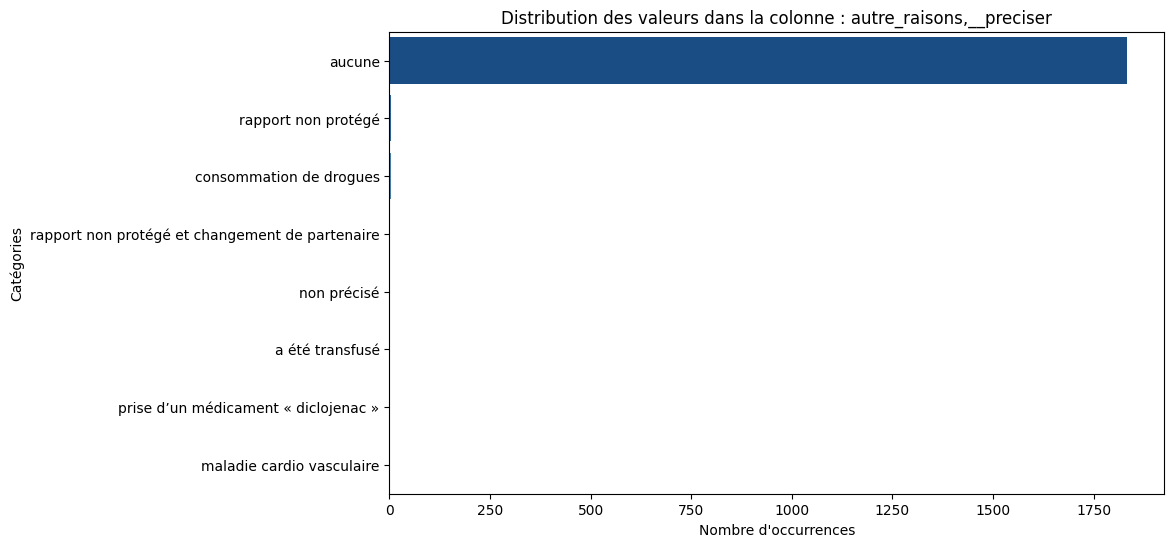


🏆 **Mode (valeur la plus fréquente) :** `aucune`
🔵 Analyse des valeurs inhabituelles :
autre_raisons,__preciser
aucune                                             1834
rapport non protégé                                   3
consommation de drogues                               3
rapport non protégé et changement de partenaire       2
non précisé                                           1
a été transfusé                                       1
prise d’un médicament « diclojenac »                  1
maladie cardio vasculaire                             1
Name: count, dtype: int64

✅ **Examen terminé**



In [74]:
examiner_colonne(df, COLUMNS['AUTRE_RAISON'])

## 5.4- Profession

🔎 **Examen de la colonne : `profession`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 520
profession
Etudiant (e)          276
Sans Emplois          206
Commerçant (e)        115
Chauffeur              58
Mécanicien             57
Eleve                  35
Ménagère               29
Enseignant (e)         29
Maçon                  28
Personnel de sante     27
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 141
- Présence de caractères spéciaux : 780



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


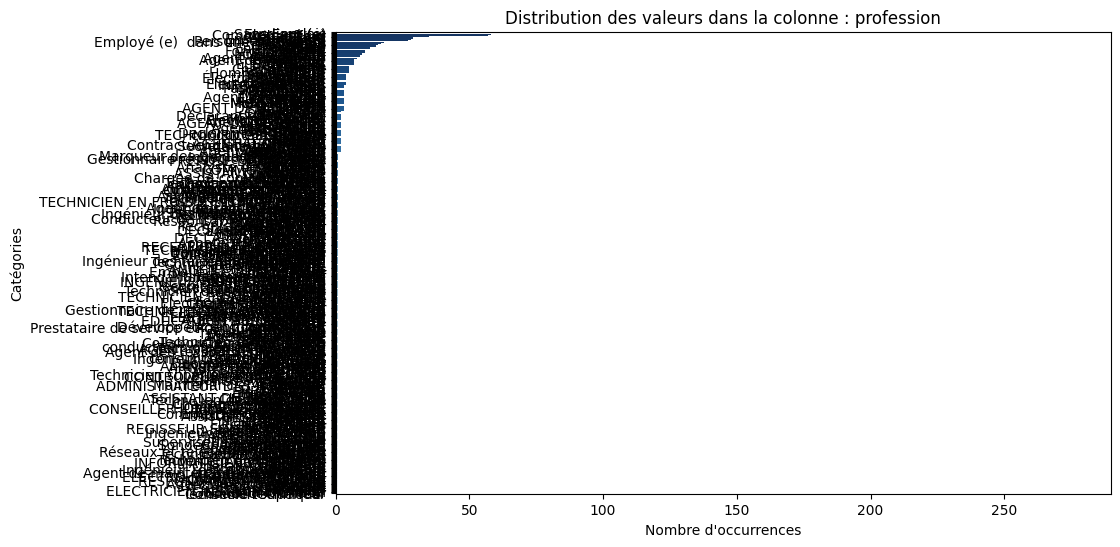


🏆 **Mode (valeur la plus fréquente) :** `Etudiant (e)`
🔵 Analyse des valeurs inhabituelles :
profession
Etudiant (e)          276
Sans Emplois          206
Commerçant (e)        115
Chauffeur              58
Mécanicien             57
Eleve                  35
Ménagère               29
Enseignant (e)         29
Maçon                  28
Personnel de sante     27
Name: count, dtype: int64

✅ **Examen terminé**



In [75]:
examiner_colonne(df, COLUMNS['PROFESSION'])

### **🔎 Interprétation**
- Nous avons pas de valeur manquante
- Beaucoup de valeur identiques mais mal écrit

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [76]:
correction_mapping = {
    'eleve' : 'élève',
    'elève' : 'élève',
    'etudiant': 'étudiant',
    'etudiant e': 'étudiant',
    'commerçant e': 'commerçant',
    'enseignant e': 'enseignant',
    'employé e dans une entreprise': 'employé dans une entreprise',
    'ingenieur': 'ingénieur',
    'agent de securité' : 'agent de sécurité',
    'agent de securite' : 'agent de sécurité',
    'electrotechnicien': 'électrotechnicien',
    'agent dentretien' : 'agent d\'entretien',
    'moto taximan': 'moto-taximan',
    'bensikineur': 'moto-taximan',
    'motoman': 'moto-taximan',
    'r a s': 'pas précisé',
    'pas precisé': 'pas précisé',
    'non precise': 'pas précisé',
    'pas précise': 'pas précisé',
    'pas mentionné': 'pas précisé',
    'pas precise': 'pas précisé',
    'menagere': 'ménagere',
    'secretaire': 'sécretaire',
    'agent dappui pharmicie': 'agent d\'appui pharmicie',
    'electricien plombier': 'électricien plombier',
    'decorateur baptiment': 'décorateur bâtiment',
    'medecin': 'médecin',
    'technicien en metallurgie': 'technicien en métallurgie',
    'educateur des enfants': 'éducateur des enfants',
    'technicien mechanique' :  'technicien mecanique',
    'technicienne de surface' :  'technicien de surface',
    'assurent': 'assurant',
    'electro mecanicien' : 'électromécanicien',
    'machiniste- électricien': 'machiniste-électricien',
    'sculpteurs': 'sculpteur',
    'macon': 'maçon',
    'electricien instrumentiste': 'électricien instrumentiste',
    'pleg': 'enseignant'
}

df = standardiser_colonne(df, COLUMNS['PROFESSION'], correction_mapping)

✅ Colonne `profession` standardisée avec succès !


## 5.4- Situation Matrimoniale

🔎 **Examen de la colonne : `situation_matrimoniale_(sm)`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 4
situation_matrimoniale_(sm)
Célibataire     1365
Marié (e)        459
Divorcé(e)        15
veuf (veuve)       7
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 1846



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


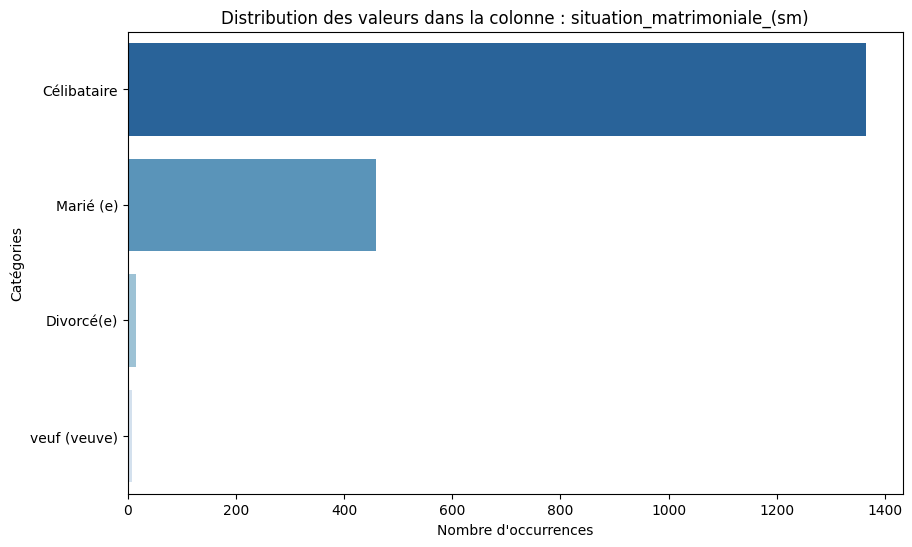


🏆 **Mode (valeur la plus fréquente) :** `Célibataire`
🔵 Analyse des valeurs inhabituelles :
situation_matrimoniale_(sm)
Célibataire     1365
Marié (e)        459
Divorcé(e)        15
veuf (veuve)       7
Name: count, dtype: int64

✅ **Examen terminé**



In [77]:
examiner_colonne(df, COLUMNS['SITUATION_MATRIMONIALE'])

## 5.5- Genre

🔎 **Examen de la colonne : `genre`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 2
genre
Homme    1664
Femme     182
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 0



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


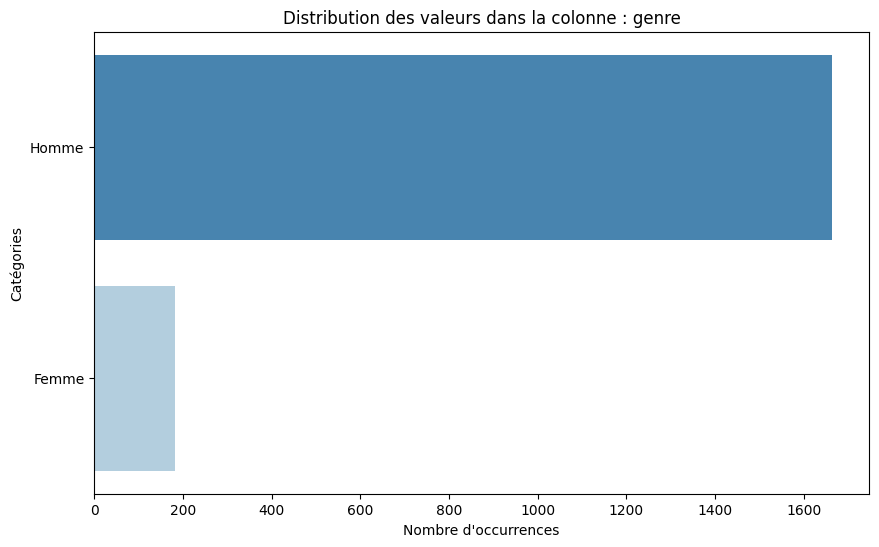


🏆 **Mode (valeur la plus fréquente) :** `Homme`
🔵 Analyse des valeurs inhabituelles :
genre
Homme    1664
Femme     182
Name: count, dtype: int64

✅ **Examen terminé**



In [78]:
examiner_colonne(df, COLUMNS['GENRE'])

## 5.6- Niveau d'étude

🔎 **Examen de la colonne : `niveau_d_etude`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 5
niveau_d_etude
Secondaire       673
Universitaire    660
Pas Précisé      345
Primaire         126
Aucun             42
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 345



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


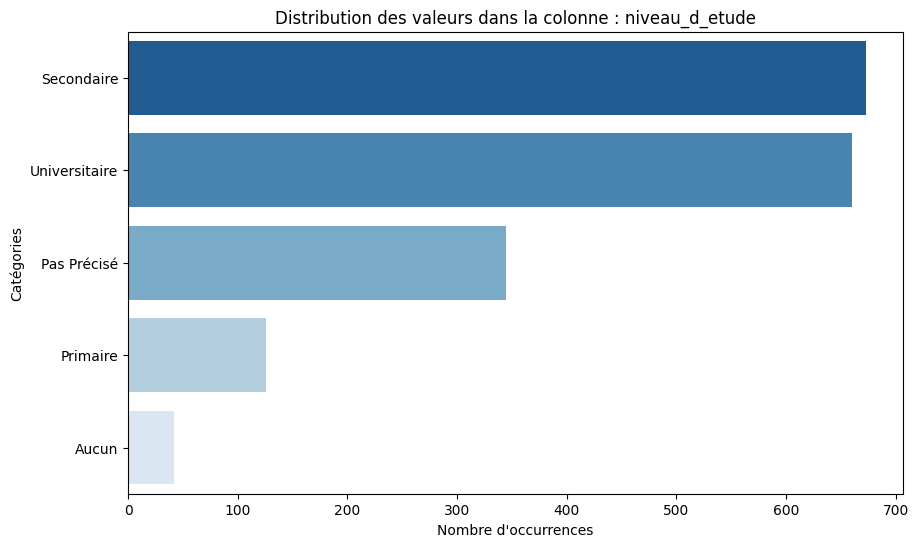


🏆 **Mode (valeur la plus fréquente) :** `Secondaire`
🔵 Analyse des valeurs inhabituelles :
niveau_d_etude
Secondaire       673
Universitaire    660
Pas Précisé      345
Primaire         126
Aucun             42
Name: count, dtype: int64

✅ **Examen terminé**



In [79]:
examiner_colonne(df, COLUMNS['NIVEAU_ETUDE'])

## 5.7- Taille

🔎 **Examen de la colonne : `taille`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : float64
- Nombre total de valeurs non-nulles : 60 / 1846
- Proportion de valeurs manquantes : 96.75%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 24
taille
170.0    8
175.0    5
167.0    5
172.0    4
178.0    4
168.0    4
176.0    3
173.0    3
177.0    3
184.0    2
Name: count, dtype: int64

📊 Statistiques descriptives :
count     60.000000
mean     172.816667
std        6.946507
min      158.000000
25%      168.000000
50%      172.000000
75%      177.000000
max      192.000000
Name: taille, dtype: float64


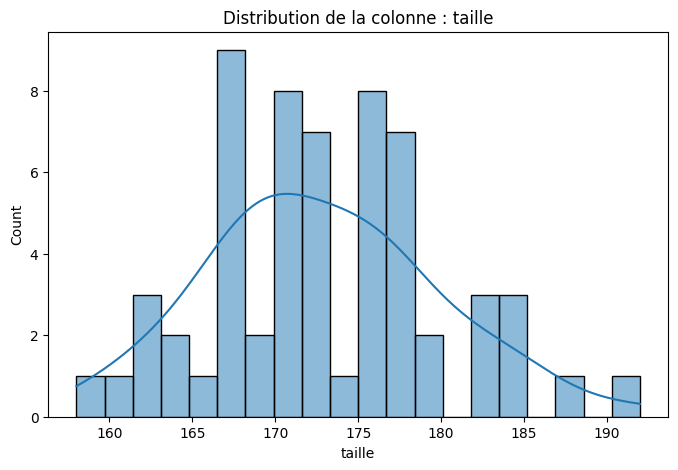

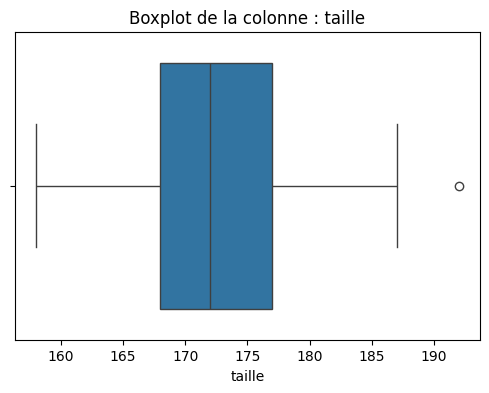

🔵 Analyse des valeurs inhabituelles :
taille
NaN      1786
170.0       8
175.0       5
167.0       5
172.0       4
178.0       4
168.0       4
176.0       3
173.0       3
177.0       3
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 1

✅ **Examen terminé**



In [80]:
examiner_colonne(df, COLUMNS['TAILLE'])

### **🔎 Observation**
- Nous avons plus de **95%** de valeur manquante, donc cette colonne est peu informative

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [81]:
# suppresion de colonne
df.drop(COLUMNS['TAILLE'], axis=1, inplace=True)

## 5.8- Poids

🔎 **Examen de la colonne : `poids`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : float64
- Nombre total de valeurs non-nulles : 104 / 1846
- Proportion de valeurs manquantes : 94.37%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 40
poids
75.0    10
76.0     7
70.0     7
65.0     5
72.0     5
85.0     5
60.0     5
90.0     4
74.0     4
69.0     4
Name: count, dtype: int64

📊 Statistiques descriptives :
count    104.000000
mean      77.278846
std       12.493460
min       55.000000
25%       69.000000
50%       75.000000
75%       85.000000
max      120.000000
Name: poids, dtype: float64


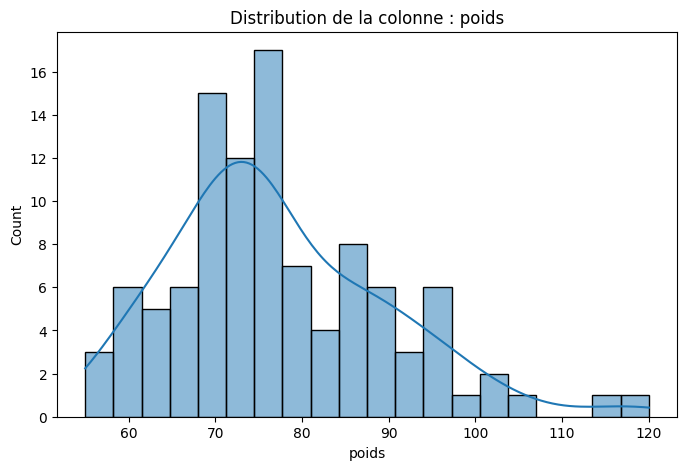

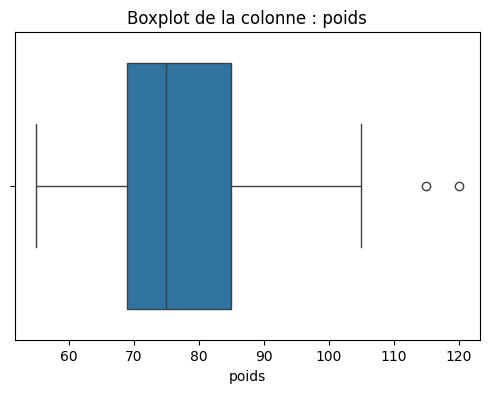

🔵 Analyse des valeurs inhabituelles :
poids
NaN     1742
75.0      10
70.0       7
76.0       7
65.0       5
60.0       5
85.0       5
72.0       5
90.0       4
74.0       4
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 2

✅ **Examen terminé**



In [82]:
examiner_colonne(df, COLUMNS['POIDS'])

### **🔎 Observation**
- Nous avons plus de **90%** de valeur manquante, donc cette colonne est peu informative

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [83]:
# suppresion de colonne
df.drop(COLUMNS['POIDS'], axis=1, inplace=True)

## 5.9- Nationalité

🔎 **Examen de la colonne : `nationalite`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 13
nationalite
Camerounaise      1796
R A S               27
R A S                7
RAS                  3
Centrafricaine       3
Malien               2
R.A.S                2
Tchadienne           1
Malienne             1
CENTRAFRICAINE       1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 7
- Présence de caractères spéciaux : 3



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


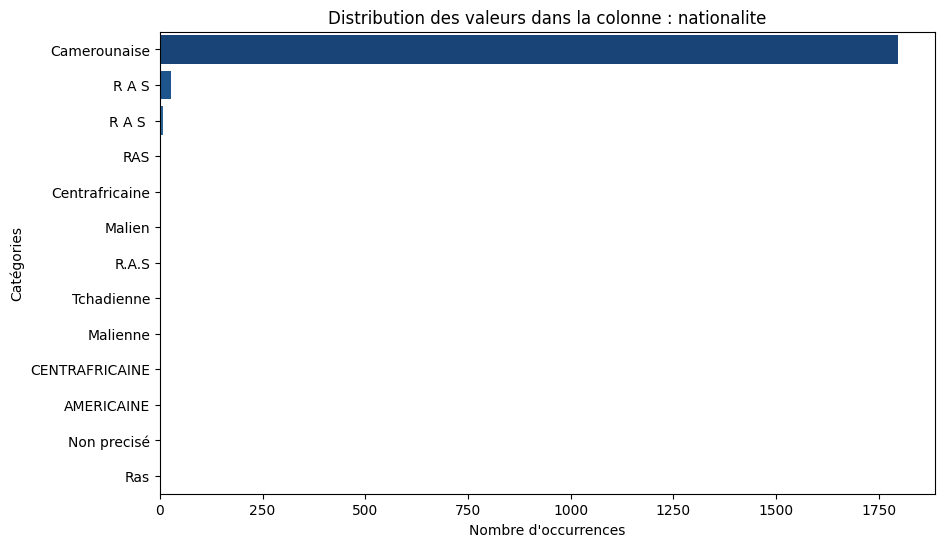


🏆 **Mode (valeur la plus fréquente) :** `Camerounaise`
🔵 Analyse des valeurs inhabituelles :
nationalite
Camerounaise      1796
R A S               27
R A S                7
RAS                  3
Centrafricaine       3
Malien               2
R.A.S                2
Tchadienne           1
Malienne             1
CENTRAFRICAINE       1
Name: count, dtype: int64

✅ **Examen terminé**



In [84]:
examiner_colonne(df, COLUMNS['NATIONALITE'])

In [85]:
df['nationalite'].value_counts()

nationalite
Camerounaise      1796
R A S               27
R A S                7
RAS                  3
Centrafricaine       3
Malien               2
R.A.S                2
Tchadienne           1
Malienne             1
CENTRAFRICAINE       1
AMERICAINE           1
Non precisé          1
Ras                  1
Name: count, dtype: int64

### **🔎 Observation**
- Beaucoup de valeur identique mais mal écrite 

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [86]:
correction_mapping = {
    'ras' : 'pas précisé',
    'r a s' : 'pas précisé',
    'non precisé' : 'pas précisé',
    'rien' : 'pas précisé',
    'malien' : 'malienne',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['NATIONALITE'], correction_mapping)

✅ Colonne `nationalite` standardisée avec succès !


🔎 **Examen de la colonne : `nationalite`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 7
nationalite
camerounaise      1796
pas précisé         39
centrafricaine       4
malienne             3
r.a.s                2
tchadienne           1
americaine           1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 41



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


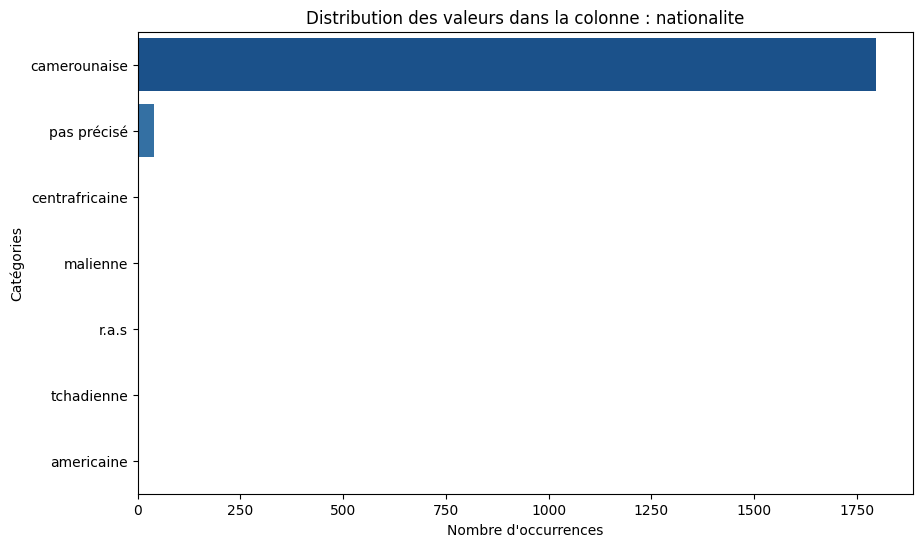


🏆 **Mode (valeur la plus fréquente) :** `camerounaise`
🔵 Analyse des valeurs inhabituelles :
nationalite
camerounaise      1796
pas précisé         39
centrafricaine       4
malienne             3
r.a.s                2
tchadienne           1
americaine           1
Name: count, dtype: int64

✅ **Examen terminé**



In [87]:
examiner_colonne(df, COLUMNS['NATIONALITE'])

## 5.10- Réligion 

🔎 **Examen de la colonne : `religion`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 36
religion
Chretien (Catholique)       712
Pas Précisé                 593
Chretien (Protestant )      332
Musulman                     81
Chretien (Ne de nouveau)     42
Non-croyant                  19
Chrétien non précisé          8
Traditionaliste               8
Chretien                      8
pentecôtiste                  3
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 2
- Présence de caractères spéciaux : 1722



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


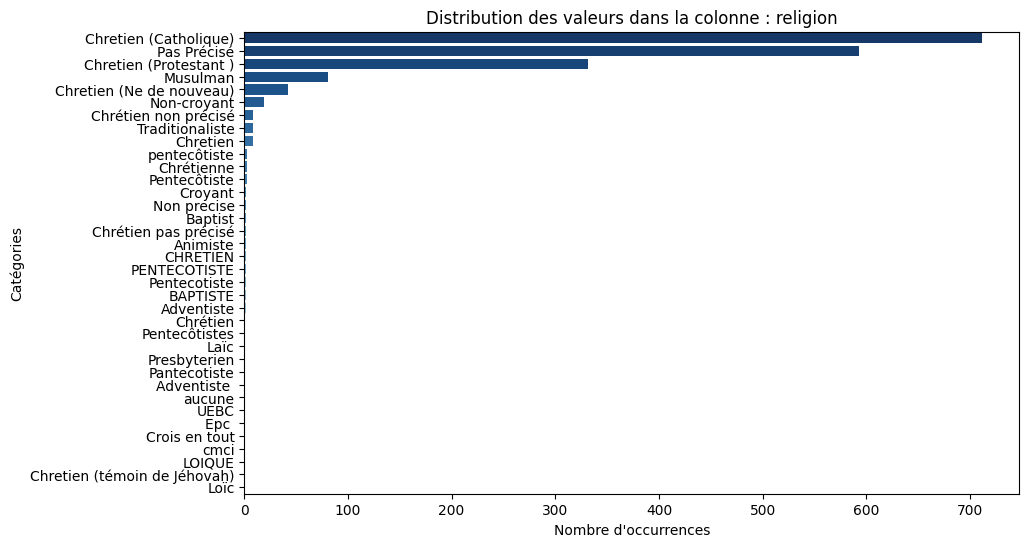


🏆 **Mode (valeur la plus fréquente) :** `Chretien (Catholique)`
🔵 Analyse des valeurs inhabituelles :
religion
Chretien (Catholique)       712
Pas Précisé                 593
Chretien (Protestant )      332
Musulman                     81
Chretien (Ne de nouveau)     42
Non-croyant                  19
Chrétien non précisé          8
Traditionaliste               8
Chretien                      8
pentecôtiste                  3
Name: count, dtype: int64

✅ **Examen terminé**



In [88]:
examiner_colonne(df, COLUMNS['RELIGION'])

### **🔎 Observation**
- Beaucoup de valeur identique mais mal écrite 

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [89]:
correction_mapping = {
    'ras' : 'pas précisé',
    'r a s' : 'pas précisé',
    'non precise' : 'pas précisé',
    'croyant' : 'pas précisé',
    'loïc' : 'pas précisé',
    'laïc' : 'pas précisé',
    'loique' : 'pas précisé',
    'chretien catholique': 'chrétien(catholique)',
    'chretien protestant': 'chrétien(protestant)',
    'cmci': 'chrétien(protestant)',
    'baptist': 'chrétien(protestant)',
    'baptiste': 'chrétien(protestant)',
    'chretien protestant ': 'chrétien(protestant)',
    'uebc': 'chrétien(protestant)',
    'epc': 'chrétien(protestant)',
    'adventiste': 'chrétien(protestant)',
    'presbyterien': 'chrétien(protestant)',
    'chretien ne de nouveau': 'chrétien(né de nouveau)',
    'chretien': 'chrétien(non précisé)',
    'chrétienne': 'chrétien(non précisé)',
    'chrétien': 'chrétien(non précisé)',
    'chrétien pas précisé': 'chrétien(non précisé)',
    'chrétien non précisé': 'chrétien(non précisé)',
    'pentecotiste': 'chrétien(pentecôtiste)',
    'pentecôtiste': 'chrétien(pentecôtiste)',
    'pentecotiste': 'chrétien(pentecôtiste)',
    'pantecotiste': 'chrétien(pentecôtiste)',
    'pentecôtistes': 'chrétien(pentecôtiste)',
    'chretien témoin de jéhovah': 'chrétien(témoin de jéhovah)',    
    'chretien témoin de jéhovah': 'chrétien(témoin de jéhovah)',    
    'aucune': 'athée',
    'non-croyant': 'athée',
    'crois en tout': 'crédule',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['RELIGION'], correction_mapping)

✅ Colonne `religion` standardisée avec succès !


🔎 **Examen de la colonne : `religion`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 13
religion
chretien (catholique)       712
pas précisé                 600
chretien (protestant )      332
musulman                     81
chretien (ne de nouveau)     42
chrétien(non précisé)        24
athée                        20
chrétien(pentecôtiste)       12
chrétien(protestant)         11
traditionaliste               8
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 1755



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


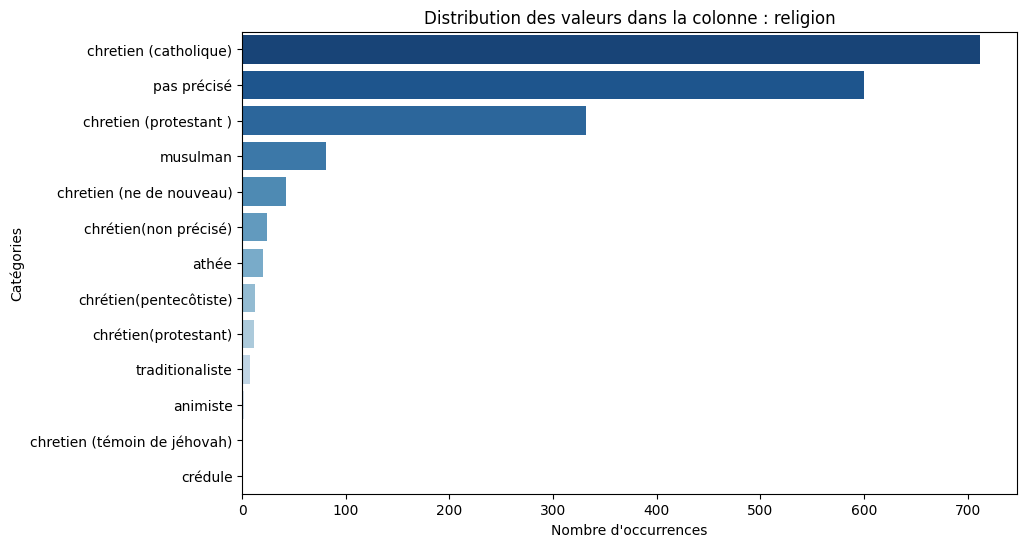


🏆 **Mode (valeur la plus fréquente) :** `chretien (catholique)`
🔵 Analyse des valeurs inhabituelles :
religion
chretien (catholique)       712
pas précisé                 600
chretien (protestant )      332
musulman                     81
chretien (ne de nouveau)     42
chrétien(non précisé)        24
athée                        20
chrétien(pentecôtiste)       12
chrétien(protestant)         11
traditionaliste               8
Name: count, dtype: int64

✅ **Examen terminé**



In [90]:
examiner_colonne(df, COLUMNS['RELIGION'])

## 5.13- Age

🔎 **Examen de la colonne : `age`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : int64
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 51
age
30    106
26    100
24     94
29     94
28     84
31     83
23     80
25     79
27     72
34     71
Name: count, dtype: int64

📊 Statistiques descriptives :
count    1846.000000
mean       31.469122
std         8.877783
min         0.000000
25%        25.000000
50%        30.000000
75%        37.000000
max        63.000000
Name: age, dtype: float64


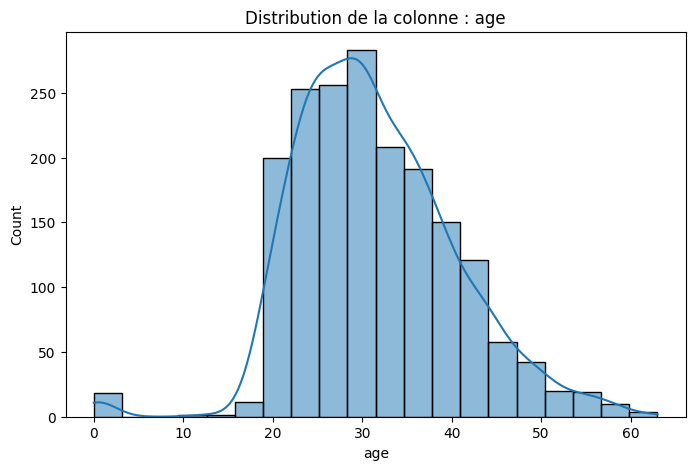

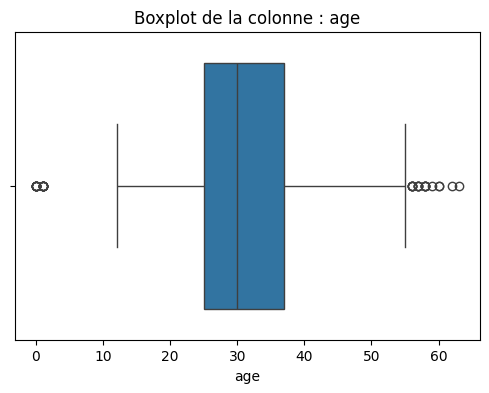

🔵 Analyse des valeurs inhabituelles :
age
30    106
26    100
24     94
29     94
28     84
31     83
23     80
25     79
27     72
34     71
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 37

✅ **Examen terminé**



In [91]:
# Afficher le DataFrame avec la nouvelle colonne "age"
examiner_colonne(df, COLUMNS['AGE'])

### **🔎 Observation**
- Nous remarquons des individus avec **0 ans**, ce qui n'est pas logique car un nouveau née ne peut pas faire un don de sang
- Nous remarquons un individu qui a **137 ans**,
- Nous remarquons des individus avec un age négatif

### 🛠️ **Traitements à effectuer**
Nous allons remplacer tout les ages incohérent par le mode.
- La tranche d'age en moyen pour faire un don de sang est de 18 à 65 ans nous allons donc estimer comment intervalle d'age conhérent les ages compris entre ]6, 80]

In [92]:
# Remplacer les âges supérieurs à 80 et inférieurs à 6 par le mode
df[COLUMNS['AGE']] = df[COLUMNS['AGE']].apply(lambda x: mode(df[COLUMNS['AGE']]) if x > 80 or x < 6 else x)

🔎 **Examen de la colonne : `age`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : int64
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 49
age
30    124
26    100
24     94
29     94
28     84
31     83
23     80
25     79
27     72
34     71
Name: count, dtype: int64

📊 Statistiques descriptives :
count    1846.000000
mean       31.756771
std         8.330302
min        12.000000
25%        25.000000
50%        30.000000
75%        37.000000
max        63.000000
Name: age, dtype: float64


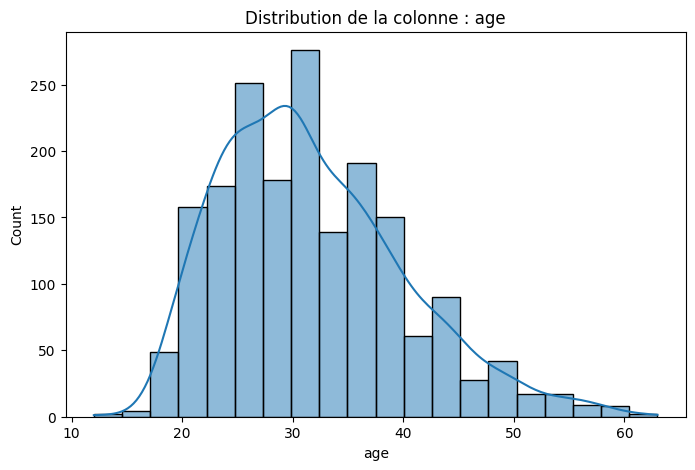

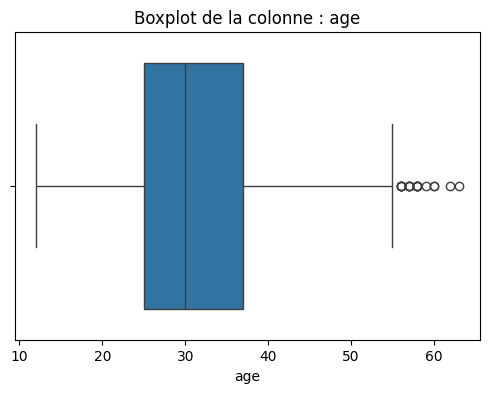

🔵 Analyse des valeurs inhabituelles :
age
30    124
26    100
24     94
29     94
28     84
31     83
23     80
25     79
27     72
34     71
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 19

✅ **Examen terminé**



In [93]:
examiner_colonne(df, COLUMNS['AGE'])

## 5.14- Date de dernière règle

🔎 **Examen de la colonne : `date_de_dernieres_regles_(ddr)`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 37 / 1846
- Proportion de valeurs manquantes : 98.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 1
date_de_dernieres_regles_(ddr)
00:00.0    37
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 1809
- Présence de caractères spéciaux : 37



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


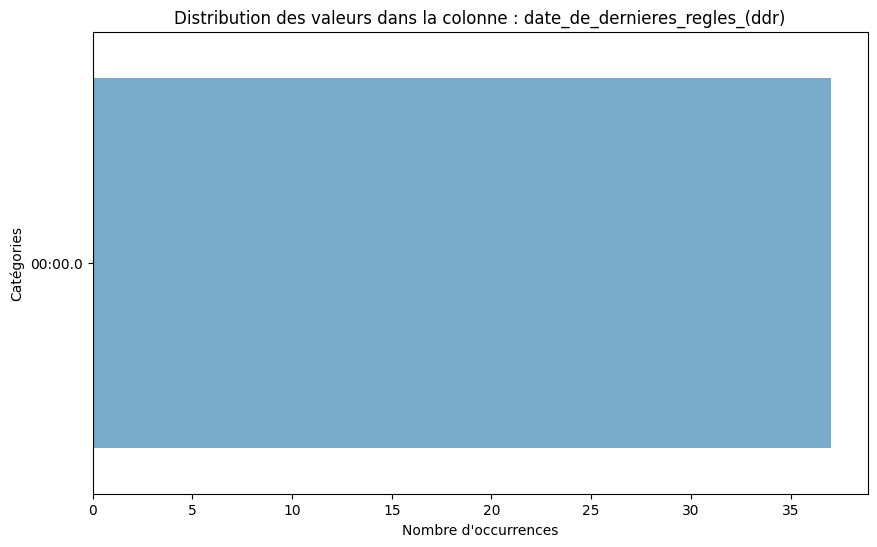


🏆 **Mode (valeur la plus fréquente) :** `00:00.0`
🔵 Analyse des valeurs inhabituelles :
date_de_dernieres_regles_(ddr)
NaN        1809
00:00.0      37
Name: count, dtype: int64

✅ **Examen terminé**



In [94]:
examiner_colonne(df, COLUMNS['DATE_DE_DERNIERES_REGLES'])

### **🔎 Observation**
- Nous avons plus de **95%** de valeur manquante, et plus elle permet d'expliquer une raison de non disponibilité a cause de la date des dernière règle.

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [95]:
# suppresion de colonne
df.drop(COLUMNS['DATE_DE_DERNIERES_REGLES'], axis=1, inplace=True)

## 5.14- Taux d'hemoglobine

🔎 **Examen de la colonne : `taux_d_hemoglobine`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1017 / 1846
- Proportion de valeurs manquantes : 44.91%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 127
taux_d_hemoglobine
13      87
14      59
13.5    34
13.9    32
15      30
13.8    30
13.4    30
13.6    29
13.7    28
13.2    27
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 829
- Présence de caractères spéciaux : 805



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


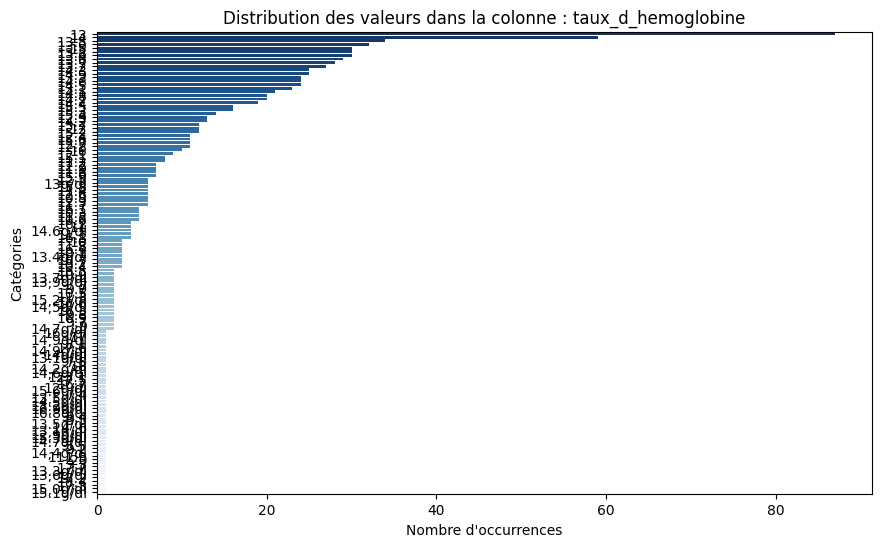


🏆 **Mode (valeur la plus fréquente) :** `13`
🔵 Analyse des valeurs inhabituelles :
taux_d_hemoglobine
NaN     829
13       87
14       59
13.5     34
13.9     32
13.8     30
15       30
13.4     30
13.6     29
13.7     28
Name: count, dtype: int64

✅ **Examen terminé**



In [96]:
examiner_colonne(df, COLUMNS['TAUX_HEMOGLOBINE'])

### **🔎 Observation**
- Cette colonne permet d'explique une raison de non indisponibilité à cause d'un taux d'hémoglobine bas
- Et cette caractéristique n'entre pas en jeu dans les fonctionnalités à dévélopper

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [97]:
# suppresion de colonne
df.drop(COLUMNS['TAUX_HEMOGLOBINE'], axis=1, inplace=True)

## 5.13- Quartier de residence

🔎 **Examen de la colonne : `quartier_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 576
quartier_de_residence
Douala          175
Yassa            50
Deido            32
Village          32
DOUALA           31
Bonamoussadi     31
Logbaba          29
Non précisé      29
Nyalla           29
Makepe           26
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 109
- Présence de caractères spéciaux : 157



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


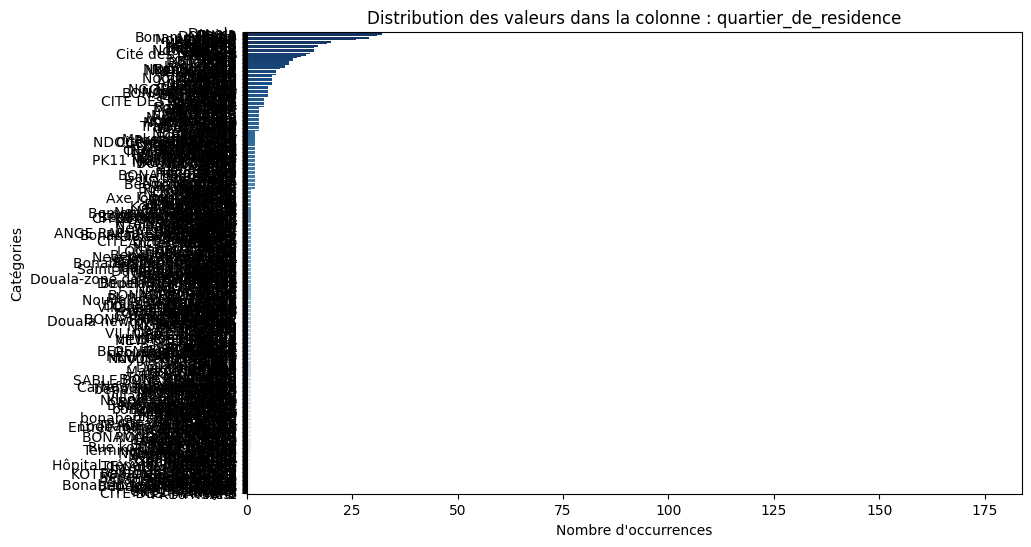


🏆 **Mode (valeur la plus fréquente) :** `Douala`
🔵 Analyse des valeurs inhabituelles :
quartier_de_residence
Douala          175
Yassa            50
Deido            32
Village          32
DOUALA           31
Bonamoussadi     31
Logbaba          29
Non précisé      29
Nyalla           29
Makepe           26
Name: count, dtype: int64

✅ **Examen terminé**



In [98]:
examiner_colonne(df, COLUMNS['QUARTIER_DE_RESIDENCE'])

### **🔎 Observation**
- Beaucoup de valeur identique mais mal écrite 

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [99]:
corrections_quartiers = {
    ('akoua', 'akwa', 'akwa ngodi', 'akwa nord'): "akwa",
    
    ('ange raphael', 'ange raphael campus 2','ange raphaël','anhe rafael', 'ange rafael'): "ange-raphael",
     
    ('ari', 'ari village','carrefour ari','carrefour agip'): "ari",
    ('beedi', 'beedi malangue'): "beedi",
    
    ('axe lourd bependa',  'bepanda omnisport', 'bepanda omnisports','bependa aeroport','bependa maturite', 'bependa tonnerre','bependa casmando','bependa','bepanda'): "bependa",
    ('besengue', 'bessengue', 'essengue', 'gare bessengue'): "bessengue",
    ('billongue', 'bilongue'): "bilongue",
    
    ('binamoussadi','bonamoussadi','sable bonamoussadi') : "bonamoussadi",
    ('bois de singe', 'bois des singes'):'bois des singes',
    
    ('boko', 'boko cogefar', 'boko plage','boko village', 'boko-plage','kambo boko'): 'boko',
    ('bonabeerie', 'besseke bonaberi','bonaberi','bonaberi entree cebec', 'bonaberi ndoba', 'bonaberi ndobo', 'bonaberi sctm','bonabéri',
     'bonabéri', 'bonabéri (grand baobab)', 'bonabéri grand-hangar'): "bonaberi",
    
    ('bona priso goupwe','bonadouma-bonapriso', 'bonaorisso', 'bonapriso','bonapriso 2', 'bonapriso rue koloko','rue koloko bonapriso'): "bonapriso",
    ('bonandjo', 'bonanjo'):"bonandjo",
    
    ('bonateki', 'bonateki deido','deido','deïdo', 'déido'):"deido",
    
    ('borne 10', 'borne 10 village','cité belge','cite berge', 'ipd', 'itba village', 'village','tradex village', 'village borne 10', 'village cite de bille'
     , 'village entrée bille', 'village entrée lycée', 'village marche', 'village marché', 'villoage marche','shele village', 'she’ll village', 'she’ll-village'): "village",
    
    ('bp cite', 'bp cité', 'bp site', 'bp8232'):"bp-cité",
    ('brassaville', 'brazaville', 'brazzaville'):"brazaville",
    ('ccc', 'ccc ndokotti','douala ccc','ndokoti', 'ndokotti','ndokotti ccc','rond point ccc'):"ndokotti",
    
    ('cite cic','cite cicam','cite de cille', 'cite de bille','cite sic','cité maetude', 'cité sic', 'cité-sic', 'cité-sic bassa','nouvelle route cité sic', 'cite cic'):"cité cic",
    ('cite de palmier', 'cite des pakmiers', 'cite des palmiers','citee des palmiers','cité des palmiers'):"cité des palmiers",
    ('cogefar', 'combi', 'congefar','entrée mini cité cogefar','village cogefar'): "cogefar",
    
    ( 'bakie ndagpassi','bdogpassi', 'dogbassi', 'dogbassi 3', 'dogpassi','douala ndogpassi', 'douala ndopassiz','Ndogpassi',
     'ndobassi 2', 'ndog passi 3', 'ndog-passi','ndogbassi','ndogpass 3', 'ndogpassi', 'ndogpassi i', 'ndogpassi ii', 'ndogpassi iii',
     'ndogpassi marché', 'ndogpassi village', 'ndogpassi3', 'ndogpassi3', 'ndogpassiii', 'ndogpossi','ndogpassi 1', 'ndogpassi 2', 'ndogpassi 3',
     'ndokpassi'):"ndogpassi",
    
    ('dibom iii', 'dibombari', 'diboum 3'):"dibombari",
    ('douala','douala douala','douala 812.12','douala non précisé','douala(non) précisé', 'douala-douala', 'douala-zone de reeassement'):"douala",
    ('douala newbell', 'douala newtown  aéroport', 'new bel','new bell','new bell bassa', 'new priso', 'new ton aeroport',
     'new town aéroport', 'new-bell','new-bell /nkouloulou', 'new-deido','newbell','newton  airport', 'newton aeroport', 'newton aéroport',
     'nkoulouloun','pk5', 'pk5 new bell'): "newbell",
    
    ('nyalla', 'douala nyalla','nialla','nyala', 'nyala château', 'nyalla chateau', 'nyalla haoussa', 'nyalla japoma', 'nyalla kambo 2',
     'nyalla pariazo','nyalla pariso', 'nyalla pays bas', 'nyalla-kambo','parisot nyalla', 'nyassa', 'nylon', 'nylon brazzaville', 'nylon brazzaville', 'n’y alla pariso'): "nyalla",
    
    ( 'edea', 'edéa','édea'):"édéa",
    ('elf', 'elf (rond point)'): "elf",
    ('douala oyack','oyack'): "oyack",
    ('enri', 'entree bille', 'entree billes'): "entrée billes", 
    ('entree chinoise', 'entrée chinois','entrée chinois'): "entrée chinoise",
    ('harry', 'harry yassa', 'henry'): "yassa",
    ('hôpital général', 'hôpital général de douala'): "hopital général",
    ('japoma', 'japouma'): "japoma",
    ('jardin logbaba','jardin ndogmbe', 'journaliste','log baba', 'log-baba', 'logbaba','logbaba jardin', 'logbaba plateau', 'logbaba saint thomas', 'logbaba st thomad', 'saint thomas', 'saint thomas logbaba'): "logbaba",
    ('kms', 'kotto', 'kotto bonamoussadi', 'kotto immeuble', 'kotto- chefferie') : "kotto",
    ('logbesou', 'logbessou') : "logbessou" ,
    ('makepe', 'makepe misoke', 'makepe missoke', 'makèpè') : "makepe" ,
    ('ndg-bong','ndobo','ndobong','ndogbong citadelle', 'ndongbong', 'dongbang') : "ndongbong",
    ( 'ndogsibi', 'ndogsimbi','ndogssimbi') :"ndogssimbi",
    ('ngodi', 'ngodi akwa','ngodi bakogo','ngodi bakoko', 'ngodi bonomo', 'ngodi- akwa', 'ngodi- bakoko'):"ngodi",
    ('nkol mbong','nkolbon', 'nkolbong', 'total nkolobong', 'total nkolbong', 'total nkolmbon') : "nkolbong", 
    ('nkomondo', 'nkong mondo', 'nkong-mondo', 'nkongmondo', 'nkonguondo', 'nkonmondo') : "nkomondo",
    ('nkouabang'): "nkoabang",
    ('non precise', 'non precisé','non précisé','pas mentionné', 'pas precise','pas précisé','pas precisé','pihidibamba', 'r a s', 'r .a.s','ras','rien', 'r as', 'aucun', 'non précise'): "pas précisé",
    ("pk8", 'pk 8 entrée laïque') : "pk 8",
    ('pk13','pk13', 'pk13 bassa'):"pk 13",
    ('pk16','pk16 nsape', 'pk16(sappe )'):"pk 16",
    ('pk11 bassa', 'pk11 mbengue city', "pk11"): "pk 11",
    ('pk12 emmene cite','pk12 mandjab','pl12', "pk12") : "pk 12",
    ('yassa','yassa tika') : "yassa",
    ('yaounde', 'yaoundé'): "yaoundé",
    ('yatchika', 'yatika') : "yatchika",
    ('tradex borne 10', 'tradex kotto') : "kotto",
    ('tergal', 'tergale') : "tergal" , 
    ('soboum', 'soboum-dakar','souboun'): "soboum",
    ('terminus', 'terminus saint michel', 'terminus ucb') : "terminus",
    ('song mahop', 'songmahop'): "songmahop",
    ( 'texaco aeroport', 'texaco aéroport', 'total aeroport'): "texaco aeroport",
    ('yansoki','yansoki bakoko') : "yansoki",
    ('tradex bonne dix', 'tradex borne 10') : "borne 10",
    ('ndopassi iii', 'ndopassi 3') : "Ndogpassi 3",
    ('cite de la paix', 'ndopassi 3') : "cité de la paix",
    ('missole ii') : "missole 2"
}

# Fonction de correction
def corriger_quartier(quartier):
    quartier = quartier.lower().strip()
    for keys, valeur_corrigee in corrections_quartiers.items():
        if quartier in keys:
            return valeur_corrigee
    return quartier

# Appliquer la correction
df[COLUMNS['QUARTIER_DE_RESIDENCE']] = df[COLUMNS['QUARTIER_DE_RESIDENCE']].apply(corriger_quartier)


🔎 **Examen de la colonne : `quartier_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 156
quartier_de_residence
douala         235
ndogpassi      102
pas précisé     93
newbell         79
nyalla          77
yassa           75
village         67
bonaberi        60
bependa         53
logbaba         52
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 204



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


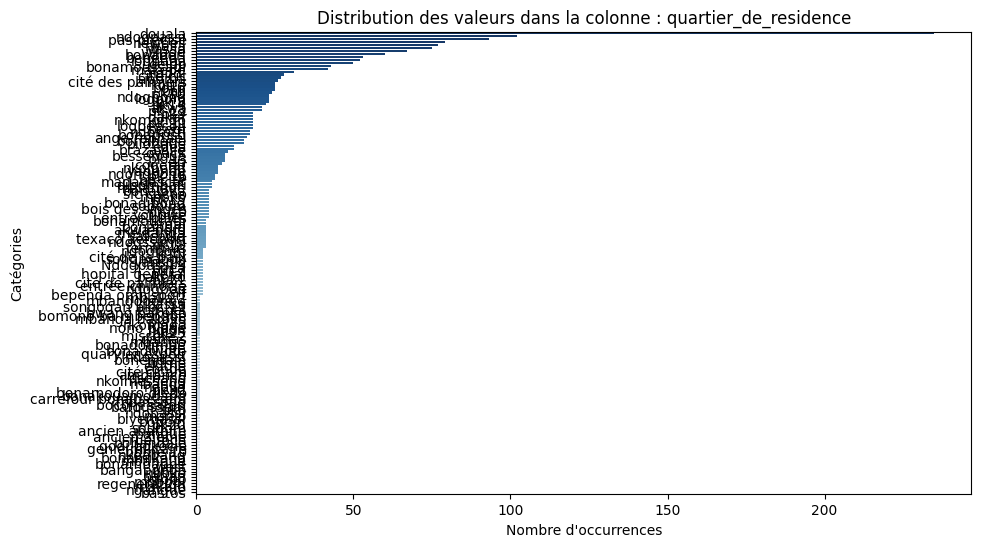


🏆 **Mode (valeur la plus fréquente) :** `douala`
🔵 Analyse des valeurs inhabituelles :
quartier_de_residence
douala         235
ndogpassi      102
pas précisé     93
newbell         79
nyalla          77
yassa           75
village         67
bonaberi        60
bependa         53
logbaba         52
Name: count, dtype: int64

✅ **Examen terminé**



In [100]:
examiner_colonne(df, COLUMNS['QUARTIER_DE_RESIDENCE'])

## 5.13- Arrondissement de résidence

🔎 **Examen de la colonne : `arrondissement_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 41
arrondissement_de_residence
Douala (Non précisé )    951
Douala 3                 381
Douala 5                 210
Douala 2                  78
Douala 1                  72
Douala 4                  61
Non précisé               14
Yaounde                   13
Edea                      11
R A S                      6
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 7
- Présence de caractères spéciaux : 973



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


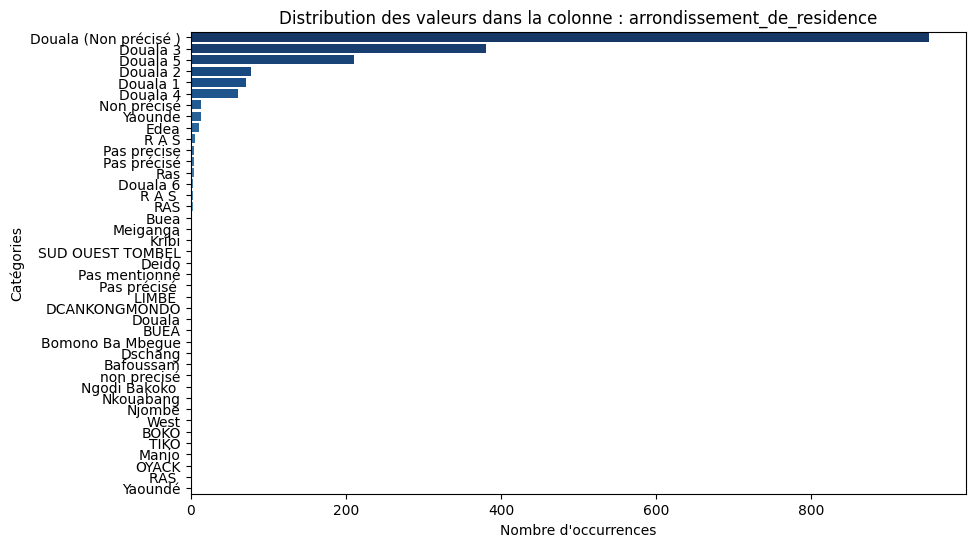


🏆 **Mode (valeur la plus fréquente) :** `Douala (Non précisé )`
🔵 Analyse des valeurs inhabituelles :
arrondissement_de_residence
Douala (Non précisé )    951
Douala 3                 381
Douala 5                 210
Douala 2                  78
Douala 1                  72
Douala 4                  61
Non précisé               14
Yaounde                   13
Edea                      11
R A S                      6
Name: count, dtype: int64

✅ **Examen terminé**



In [101]:
examiner_colonne(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'])

### **🔎 Observation**
- Beaucoup de valeur identique mais mal écrite 
- Nous avons certains arrondissement qui ne sont pas précisé et que le quartier est précisé.
- Nous avons remarqué la presence de quartier portant le nom de ville, ce qui nous permet de connaitre la ville mais depression sur le quartier

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- Recherche de l'arrondissement en fonction du quartier
- Creation de la colonne Ville puis suppression des quartiers portant le nom de ville

In [102]:
correction_mapping = {
    'ras' : 'pas précisé',
    'r a s' : 'pas précisé',
    'non précisé' : 'pas précisé',
    'pas precise' : 'pas précisé',
    'pas mentionné' : 'pas précisé',
    'non precisé' : 'pas précisé',
    'douala non précisé' : 'douala(pas précisé)',
    'doualanon précisé' : 'douala(pas précisé)',
    'douala' : 'douala(pas précisé)',
    'douala (non précisé )' : 'douala(pas précisé)',
    'yaounde' : 'yaoundé(pas précisé)',
    'yaoundé' : 'yaoundé(pas précisé)',
    'yaoundénon précisé' : 'yaoundé(pas précisé)',
    'yaoundé(non précisé)' : 'yaoundé(pas précisé)',
    'dcankongmondo':'nkongmondo',
    'edea':'édea',
    'deido': 'douala 1',
    # 'nkouabang' : ''
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'], correction_mapping)

✅ Colonne `arrondissement_de_residence` standardisée avec succès !


In [103]:
# Correction des arrondissements
df = corriger_arrondissement(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'], COLUMNS['QUARTIER_DE_RESIDENCE'], VILLES)

✅ Correction des arrondissements terminée avec succès (en minuscule et sans accents).


In [104]:
# Creation de la colonne ville
df = ajouter_colonne_ville(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'], COLUMNS['QUARTIER_DE_RESIDENCE'], VILLES)

✅ Colonne ville ajoutée avec succès.


In [105]:
# Suppression des valeurs arrondissements dont les noms sont des villes

# Remplacement de l'année "douala" par "pas précisé"
df = corriger_valeurs(df, COLUMNS['QUARTIER_DE_RESIDENCE'], motif="douala", remplacement="pas précisé")

# Remplacement de l'année "douala" par "pas précisé"
df = corriger_valeurs(df, COLUMNS['QUARTIER_DE_RESIDENCE'], motif="yaoundé", remplacement="pas précisé")

🔎 **Examen de la colonne : `ville`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 3
ville
douala     1750
inconnu      70
yaounde      26
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 0



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


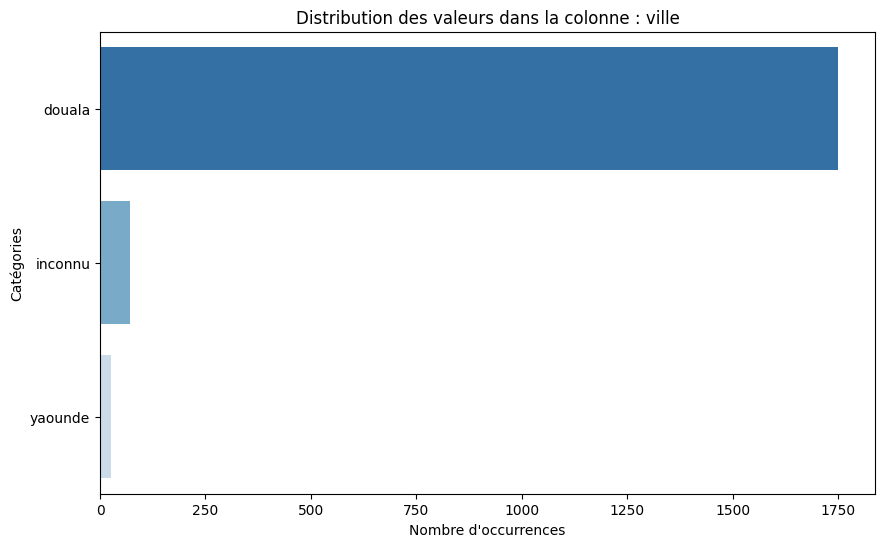


🏆 **Mode (valeur la plus fréquente) :** `douala`
🔵 Analyse des valeurs inhabituelles :
ville
douala     1750
inconnu      70
yaounde      26
Name: count, dtype: int64

✅ **Examen terminé**



In [106]:
# Examination de la colonne ville
examiner_colonne(df, COLUMNS['VILLE'])

🔎 **Examen de la colonne : `arrondissement_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1846 / 1846
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 30
arrondissement_de_residence
douala(pas précisé)     613
douala 3                516
douala 5                280
douala 1                149
douala 2                125
douala 4                 61
pas précisé              41
yaoundé(pas précisé)     12
édea                     11
yaounde 3                 9
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 677



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


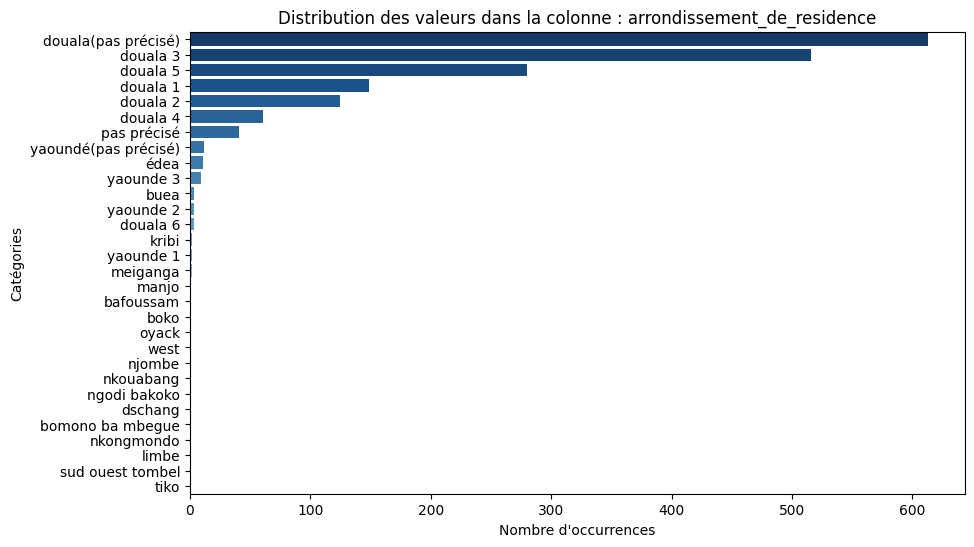


🏆 **Mode (valeur la plus fréquente) :** `douala(pas précisé)`
🔵 Analyse des valeurs inhabituelles :
arrondissement_de_residence
douala(pas précisé)     613
douala 3                516
douala 5                280
douala 1                149
douala 2                125
douala 4                 61
pas précisé              41
yaoundé(pas précisé)     12
édea                     11
yaounde 3                 9
Name: count, dtype: int64

✅ **Examen terminé**



In [107]:
examiner_colonne(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'])

In [108]:
# Exportation du fichier néttoyé au format csv
df.to_csv('../data/feuille_volontaire_cleaned.csv', index=False)